In [1]:
import os
import pickle
from dassl.data.datasets import Datum
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

In [8]:
fpath = "output/base2new/train_base/eurosat/shots_-1/ALVLM_DoCoCoOp_clustering/vit_b16_one_time_gamma_20/seed4"

with open(os.path.join(fpath, "img_features.pkl"), "rb") as f:
    img_features = pickle.load(f)

with open(os.path.join(fpath, "sample_idx.pkl"), "rb") as f:
    sample_idx = pickle.load(f)

tsne_model = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
embedding = tsne_model.fit_transform(img_features)

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(img_features)

# 重心から近い順にサンプリング
distances = pairwise_distances(kmeans.cluster_centers_, img_features)
cluster_counts = Counter(kmeans.labels_)
sample_idx = []

GAMMA = 0.1

for cluster_id, d in enumerate(distances):
    d_minid = np.argsort(d)
    d_minid = d_minid[:int(cluster_counts[cluster_id] * GAMMA)]
    sample_idx.extend(d_minid.tolist())
    print(len(d_minid))
sample_idx_trans = np.array(list(set(sample_idx)))

# 重複を取り除く
sample_idx_trans = list(dict.fromkeys(sample_idx_trans))
sample_idx_trans = np.array(sample_idx_trans)

/home/yhiro/miniconda3/envs/dassl/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


130
176
112
105
176


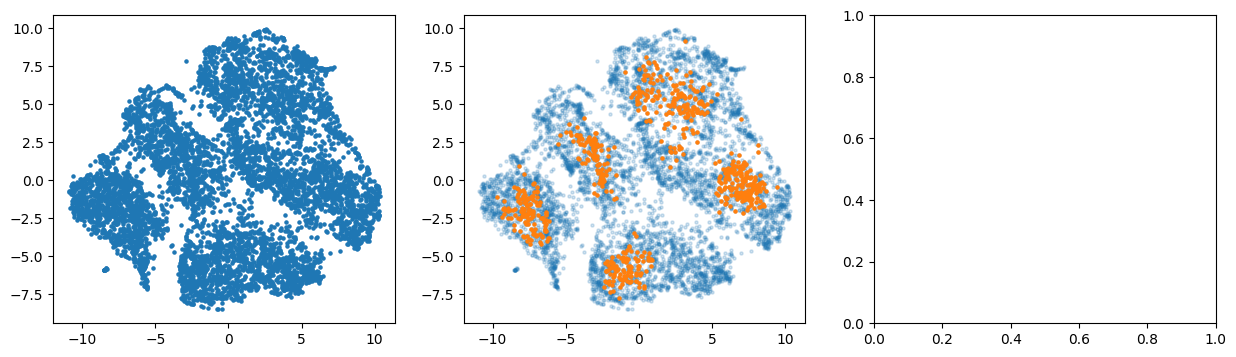

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))
ax.ravel()

ax[0].scatter(embedding[:, 0], embedding[:, 1], s=5)
ax[1].scatter(embedding[:, 0], embedding[:, 1], s=5, alpha=0.2)
ax[1].scatter(embedding[sample_idx_trans, 0], embedding[sample_idx_trans, 1], s=5)


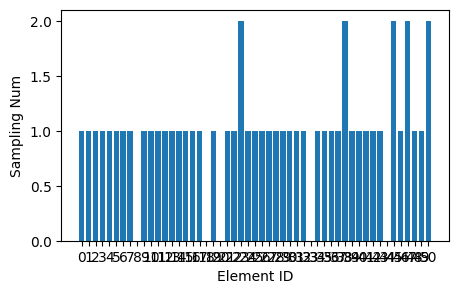

In [14]:
import re
import matplotlib.pyplot as plt

dataset = "oxford_flowers"
model = "ALVLM_DoCoCoOp_clustering_one_sample"
#model = "ALVLM_DoCoCoOp_random"
#model = "ALVLM_DoCoCoOp_badge"
#model = "ALVLM_DoCoCoOp_entropy"


#cfg = "vit_b16_one_time_gamma_20"
#cfg = "vit_b16_one_time"
cfg = "vit_b16_one_time_one_sample"

#cfg = "vit_b16"


file_path =  f"output/base2new/train_base/{dataset}/shots_-1/{model}/{cfg}/seed1/log.txt"


with open(file_path, 'r') as f:
    content = f.read()
    # 正規表現を使用してaccuracyを抽出
    content = content.replace("\n", " ")
    match = re.findall(r'tensor\(\[.*?\]\)', content)[-1]
    numbers = re.findall(r'[\d\.\d]+', match)
    numbers = [float(num) for num in numbers]

plt.figure(figsize=(5, 3))
plt.bar(range(len(numbers)), numbers, tick_label=range(len(numbers)))
plt.xlabel('Element ID')
plt.ylabel('Sampling Num')
plt.show()


In [16]:
for i in numbers:
    print(int(i))

1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
0
1
1
2
1
1
1
1
1
1
1
1
1
0
1
1
1
1
2
1
1
1
1
1
0
2
1
2
1
1
2


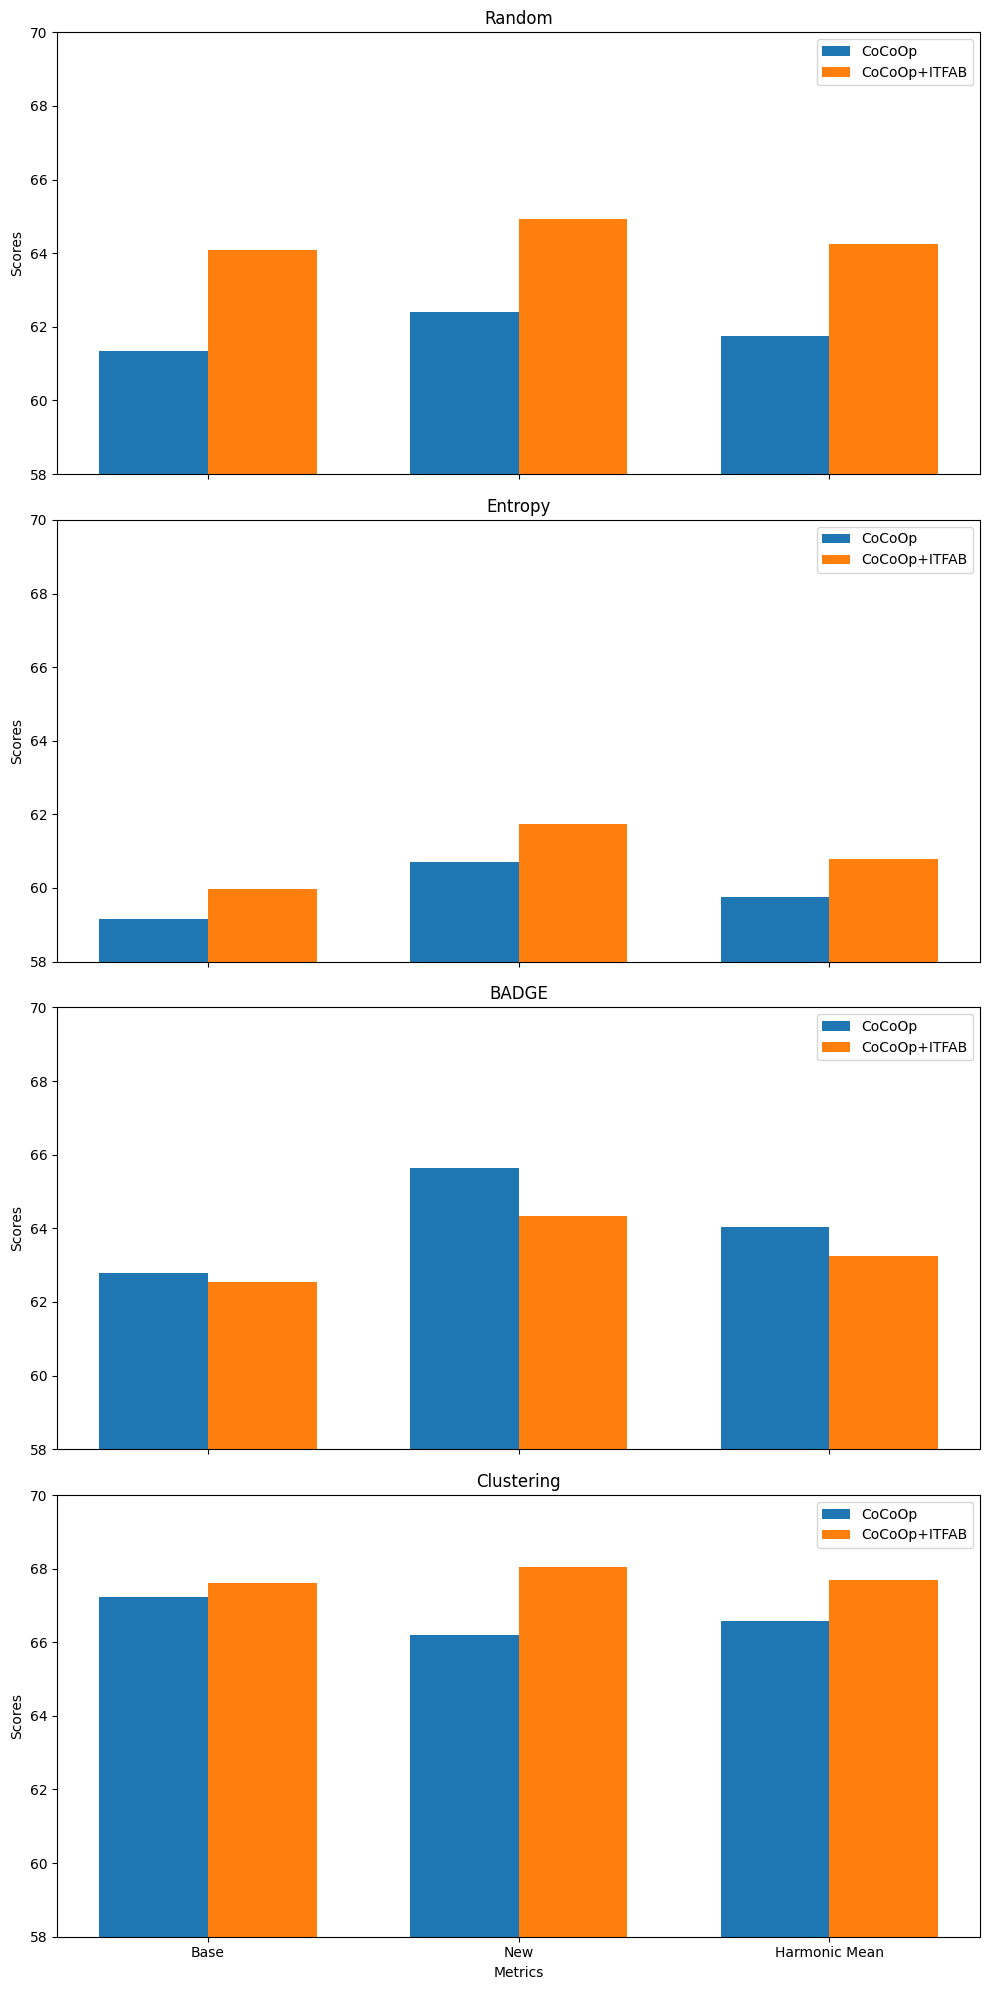

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# New data for the models
methods = ['Random', 'Entropy', 'BADGE', 'Clustering']
models = ['CoCoOp', 'CoCoOp+ITFAB']
metrics = ['Base', 'New', 'Harmonic Mean']

# Scores for each model and method
data_new = {
    'Random': {
        'CoCoOp': [61.34, 62.39, 61.75],
        'CoCoOp+ITFAB': [64.08, 64.94, 64.25]
    },
    'Entropy': {
        'CoCoOp': [59.16, 60.71, 59.75],
        'CoCoOp+ITFAB': [59.97, 61.73, 60.78]
    },
    'BADGE': {
        'CoCoOp': [62.79, 65.63, 64.04],
        'CoCoOp+ITFAB': [62.53, 64.34, 63.26]
    },
    'Clustering': {
        'CoCoOp': [67.22, 66.20, 66.59],
        'CoCoOp+ITFAB': [67.62, 68.04, 67.68]
    }
}

# Plotting the data
fig, axs = plt.subplots(4, 1, figsize=(10, 20), sharex=True)

x = np.arange(len(metrics))
width = 0.35

# Set y-axis limits to improve visibility
y_min, y_max = 58, 70

for idx, method in enumerate(methods):
    ax = axs[idx]
    model_cocoop_scores = data_new[method]['CoCoOp']
    model_cocoop_itfab_scores = data_new[method]['CoCoOp+ITFAB']
    
    ax.bar(x - width/2, model_cocoop_scores, width, label='CoCoOp')
    ax.bar(x + width/2, model_cocoop_itfab_scores, width, label='CoCoOp+ITFAB')
    
    ax.set_ylim(y_min, y_max)
    ax.set_title(method)
    ax.set_ylabel('Scores')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

axs[-1].set_xlabel('Metrics')

plt.tight_layout()
plt.show()


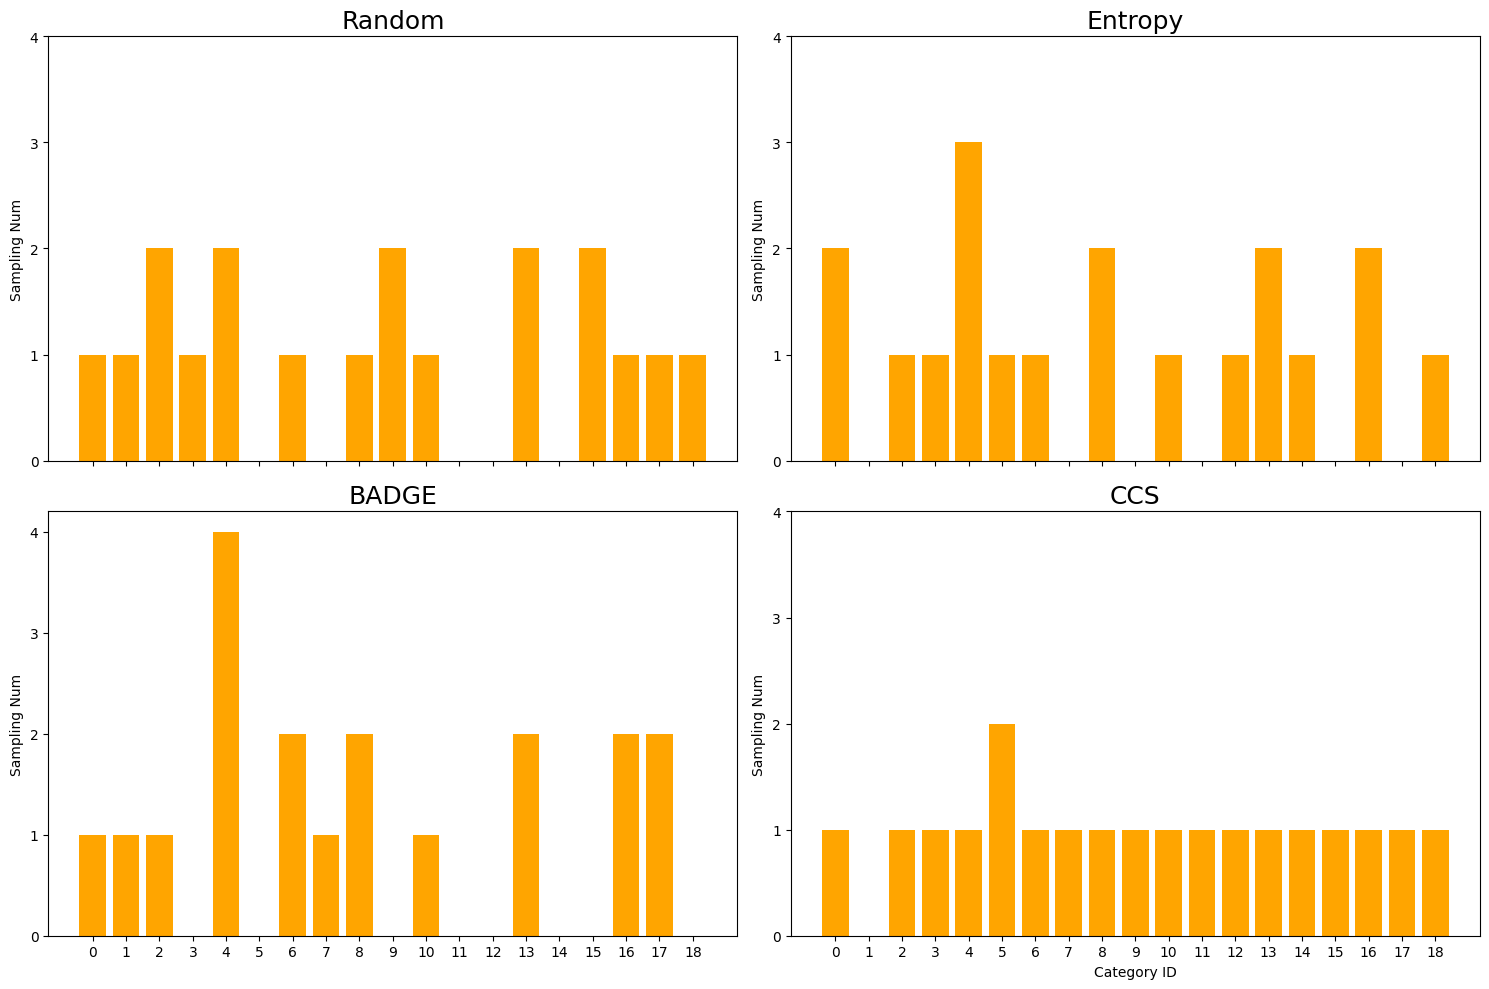

In [3]:
import matplotlib.pyplot as plt

# Recreate the data
element_id = list(range(19))
random = [1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 1]
entropy = [2, 0, 1, 1, 3, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1]
badge = [1, 1, 1, 0, 4, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0]
ccs = [1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

all = random+entropy+badge+ccs

fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

# Plotting each method
axs[0, 0].bar(element_id, random, color='orange')
axs[0, 0].set_title('Random', fontsize=18)
axs[0, 0].set_ylabel('Sampling Num')
axs[0, 0].set_yticks(range(0, max(all) + 1))

axs[0, 1].bar(element_id, entropy, color='orange')
axs[0, 1].set_title('Entropy', fontsize=18)
axs[0, 1].set_ylabel('Sampling Num')
axs[0, 1].set_yticks(range(0, max(all) + 1))

axs[1, 0].bar(element_id, badge, color='orange')
axs[1, 0].set_title('BADGE', fontsize=18)
axs[1, 0].set_ylabel('Sampling Num')
axs[1, 0].set_yticks(range(0, max(all) + 1))

axs[1, 1].bar(element_id, ccs, color='orange')
axs[1, 1].set_title('CCS', fontsize=18)
axs[1, 1].set_xlabel('Category ID')
axs[1, 1].set_ylabel('Sampling Num')
axs[1, 1].set_yticks(range(0, max(all) + 1))

# Adjusting x-axis ticks and labels
plt.xticks(element_id, element_id)

plt.tight_layout()
plt.show()


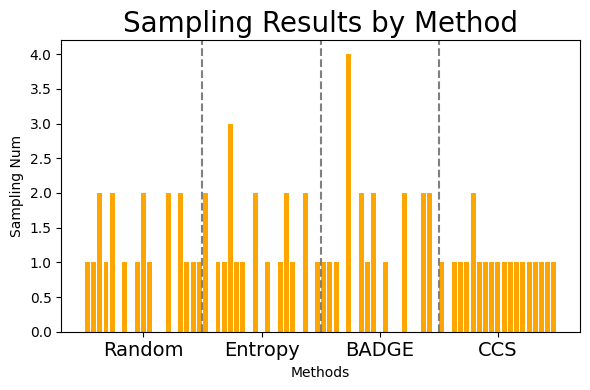

In [12]:
# Combine all data into one plot with vertical lines between the results

# Offsets for different categories
offset = len(element_id)
positions = element_id + [x + offset for x in element_id] + [x + 2 * offset for x in element_id] + [x + 3 * offset for x in element_id]

# Combine all data
combined_data = random + entropy + badge + ccs
labels = ['Random'] * len(element_id) + ['Entropy'] * len(element_id) + ['BADGE'] * len(element_id) + ['CCS'] * len(element_id)

fig, ax = plt.subplots(figsize=(6, 4))

# Plotting the data
ax.bar(positions, combined_data, color='orange')

# Adding vertical lines between different result sets
ax.axvline(x=offset - 0.5, color='gray', linestyle='--')
ax.axvline(x=2 * offset - 0.5, color='gray', linestyle='--')
ax.axvline(x=3 * offset - 0.5, color='gray', linestyle='--')

# Set labels and title
ax.set_ylabel('Sampling Num')
ax.set_xlabel('Methods')
ax.set_title('Sampling Results by Method', fontsize=20)

# Set custom ticks
ax.set_xticks([offset / 2 - 0.5, 1.5 * offset - 0.5, 2.5 * offset - 0.5, 3.5 * offset - 0.5])
ax.set_xticklabels(['Random', 'Entropy', 'BADGE', 'CCS'], fontsize=14)

plt.tight_layout()
plt.show()


/home/yhiro/miniconda3/envs/dassl/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



========== ラウンド 1 ==========
テスト精度: 1.000

========== ラウンド 2 ==========
テスト精度: 1.000

========== ラウンド 3 ==========
テスト精度: 1.000


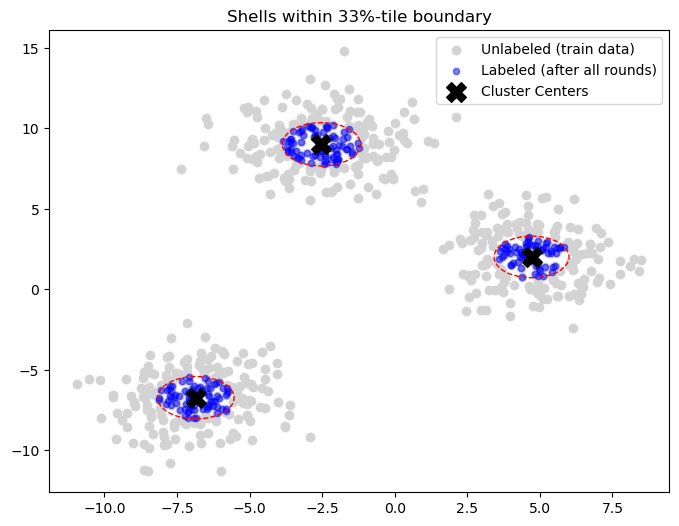

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1. 合成データの作成＆分割
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=1.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. KMeans でクラスタリング
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)
cluster_labels = kmeans.labels_           # 各サンプルが属するクラスタID
cluster_centers = kmeans.cluster_centers_ # クラスタ中心

# ラウンド数（「33%タイル以内」をさらに何分割するか）
n_shells = 3

# 以降で使うデータ構造: 各ラウンド用にサンプルインデックスをまとめる
# shell_indices[c][s]: クラスタ c のシェル s に属するサンプルIndexのリスト
shell_indices = [ [ [] for _ in range(n_shells) ] for _ in range(n_clusters) ]

# 3. 各クラスタに対して、「中心からの距離が 33%タイル以内」だけをさらに n_shells 個のシェルに分割
for c in range(n_clusters):
    # --- クラスタ c に属するサンプル ---
    c_indices = np.where(cluster_labels == c)[0]
    X_c = X_train[c_indices]
    
    # --- 中心からの距離を計算 ---
    center_c = cluster_centers[c]
    dist_c = np.linalg.norm(X_c - center_c, axis=1)
    
    # --- 33%タイルを求める ---
    dist33 = np.percentile(dist_c, 33)  # 中心からの距離分布の33%点
    
    # --- 「dist <= dist33」のサンプルだけ対象にする ---
    within_mask = (dist_c <= dist33)
    within_indices = c_indices[within_mask]  # 33%タイル以内のサンプル
    within_dist = dist_c[within_mask]
    
    # --- さらに within_dist を n_shells 等分する ---
    # たとえば n_shells=3 なら、0%, ~33.3%, ~66.7%, 100% の4点を区切りとする
    # ただし "within_dist" 自体が「0%～33%タイル」部分なので、この中でさらに分位を取る
    within_dist_sorted_indices = np.argsort(within_dist)
    within_dist_sorted = within_dist[within_dist_sorted_indices]
    
    # サブシェル用のパーセンタイル
    #   0% → 100% を n_shells に分割 ⇒ sub_q1, sub_q2, ...
    #   （ただし "within_dist" はすでに全体の33%タイル以下）
    #   → 以下はあくまで「within_dist が最小値～最大値の間」でさらに n_shells 分割です
    sub_boundaries = []
    for s in range(1, n_shells):
        p = 100.0 * s / n_shells  # 例: n_shells=3 のとき → 33.3..., 66.6...
        q_val = np.percentile(within_dist_sorted, p)
        sub_boundaries.append(q_val)
    # これで sub_boundaries = [q1, q2, ...] が得られる
    
    # 各シェルに振り分け
    # 例: シェル0 -> dist in [min, q1], シェル1 -> dist in (q1, q2], シェル2 -> dist in (q2, max]
    prev_boundary = -1e-9  # 0でもOKだが厳密には最小値以下なら何でもOKという形に
    for s, boundary in enumerate(sub_boundaries + [1e9]):  # 最後は大きい値で閉区間を作る
        shell_mask = (within_dist_sorted > prev_boundary) & (within_dist_sorted <= boundary)
        # s番目のシェルに該当する sorted index
        shell_idx_in_sorted = np.where(shell_mask)[0]
        # 実際の X_train 中の index は
        real_indices = within_indices[within_dist_sorted_indices[shell_idx_in_sorted]]
        
        shell_indices[c][s].extend(real_indices)
        prev_boundary = boundary

# 4. 各ラウンド（シェル）でサンプルを追加して学習
#   たとえば「ラウンド1→シェル0, ラウンド2→シェル1, ラウンド3→シェル2,...」
X_labeled = np.empty((0, X_train.shape[1]))
y_labeled = np.array([], dtype=int)

model = LogisticRegression(max_iter=1000)

for round_i in range(n_shells):
    print(f"\n========== ラウンド {round_i+1} ==========")
    
    # 今回追加するシェル round_i のサンプル
    new_indices = []
    for c in range(n_clusters):
        new_indices.extend(shell_indices[c][round_i])
    new_indices = np.array(new_indices)
    
    # ラベルを追加
    X_new = X_train[new_indices]
    y_new = y_train[new_indices]
    
    X_labeled = np.vstack([X_labeled, X_new])
    y_labeled = np.concatenate([y_labeled, y_new])
    
    # 学習 & 評価
    model.fit(X_labeled, y_labeled)
    score = model.score(X_test, y_test)
    print(f"テスト精度: {score:.3f}")

# 5. 可視化 (最終的にどのサンプルがラベルされたか)
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0], X_train[:,1], c="lightgray", label="Unlabeled (train data)")

# 最終的にラベルされたサンプル
plt.scatter(X_labeled[:,0], X_labeled[:,1], c="blue", s=20, alpha=0.5, label="Labeled (after all rounds)")

# 33%タイル境界(参考程度の描画): 円近似(2次元に限る)
# ここでは簡易的に各クラスタの 33% タイルを円として描く例を示します。
for c in range(n_clusters):
    center_c = cluster_centers[c]
    # 同じ要領で dist33 取得
    c_indices = np.where(cluster_labels == c)[0]
    dist_c = np.linalg.norm(X_train[c_indices] - center_c, axis=1)
    dist33 = np.percentile(dist_c, 33)
    
    circle = plt.Circle((center_c[0], center_c[1]), dist33, color='red', fill=False, linestyle='--')
    plt.gca().add_artist(circle)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker="X", s=200, c="black", label="Cluster Centers")
plt.title("Shells within 33%-tile boundary")
plt.legend()
plt.show()
